# Tools for Data Science 
# Clustering 2 - Exercise


In [59]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Example: MNIST dataset

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 

The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


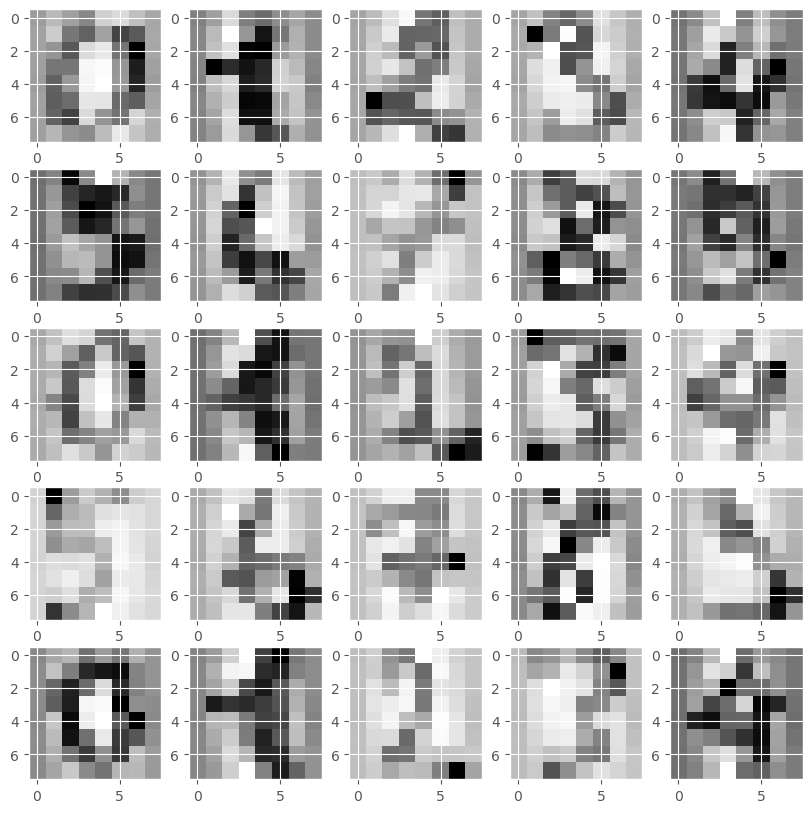

In [60]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape # Shape returns a tuple (n_samples, n_features)
n_digits = len(np.unique(digits.target)) # Number of unique labels 
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
We first use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [61]:
# Fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# Use labels to compute homogeneity score
k_means_hscore = metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)
k_means_hscore = round(k_means_hscore, 3)
print("Homogeneity score for k-means: %0.3f" % k_means_hscore)

# Use labels to compute V-measure score, extra but I wanted to see the difference
k_means_vscore = metrics.v_measure_score(labels_true=y, labels_pred=kmeans_model.labels_)
k_means_vscore = round(k_means_vscore, 3)
print("V-measure score for k-means: %0.3f" % k_means_vscore)


Homogeneity score for k-means: 0.668
V-measure score for k-means: 0.688


#### Exercise: Hierarchical clustering
Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. 

*Hint:* Use the scikit-learn function *AgglomerativeClustering*.  

In [62]:
# Hierarchical clustering fit
hierarchial_clusering_model = AgglomerativeClustering(n_clusters=n_digits, linkage='ward')
hierarchial_clusering_model.fit(X)

# Use labels to compute homogeneity score
hierarchial_hscore = metrics.homogeneity_score(labels_true=y, labels_pred=hierarchial_clusering_model.labels_)
hierarchial_hscore = round(hierarchial_hscore, 3)
print("Homogeneity score for hierarchial clustering: %0.3f" % hierarchial_hscore)

# Use labels to compute V-measure score, extra but I wanted to see the difference
hierarchial_vscore = metrics.v_measure_score(labels_true=y, labels_pred=hierarchial_clusering_model.labels_)
hierarchial_vscore = round(hierarchial_vscore, 3)
print("V-measure score for k-means: %0.3f" % hierarchial_vscore)


Homogeneity score for hierarchial clustering: 0.758
V-measure score for k-means: 0.796


#### Exercise: DBScan

Use DBScan to cluster the dataset. A problem you will face is choosing $\epsilon$. You can use the DistanceMetric function to get a sense of typical distances between points.  

In [63]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances 
df = pd.DataFrame(distances)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,9.429465,9.602031,10.347161,9.320771,10.483066,9.764437,9.368594,11.206563,9.250916,9.740384,...,9.167075,11.201947,10.214618,9.209303,11.025827,9.097838,9.804845,9.335236,9.227846,10.106628
std,3.025238,2.879556,2.702908,2.941581,2.783363,2.856713,2.930177,2.670607,2.803061,2.750411,...,2.871609,2.926652,2.738580,2.840153,2.961698,3.006655,3.004637,2.836908,2.856528,2.718451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.377907,8.445101,9.152263,8.055664,9.289648,8.457454,8.032772,10.200947,8.068446,8.527683,...,7.835470,9.791565,9.138989,7.983034,9.657150,7.529115,8.649545,8.123597,7.896166,8.822764
50%,9.269402,9.473299,10.103218,9.089083,10.210529,9.448140,9.221662,11.112941,8.837322,9.337980,...,8.838463,11.135542,9.998645,9.003926,10.920055,8.876145,9.649613,9.085757,8.921825,9.756183
75%,10.304851,10.380412,11.030820,10.050466,11.209419,10.524195,10.263819,11.886140,9.889272,10.310384,...,9.862368,12.239369,10.847290,9.905428,12.187147,10.014563,10.723950,9.988732,9.854564,10.768096
max,48.238333,48.917352,48.383393,48.996929,48.145768,49.016219,48.563717,49.503611,48.818798,49.260349,...,48.779013,47.919713,48.952603,48.931808,48.199944,48.782511,48.277673,48.703832,48.816560,48.174417


<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:41: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:41: SyntaxWarning: invalid escape sequence '\e'
/var/folders/db/t370rccd4wd43zxlc93bzwym0000gn/T/ipykernel_97161/3119481275.py:31: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Homogeneity score vs. $\epsilon$ value')
/var/folders/db/t370rccd4wd43zxlc93bzwym0000gn/T/ipykernel_97161/3119481275.py:39: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\epsilon$ value')
/var/folders/db/t370rccd4wd43zxlc93bzwym0000gn/T/ipykernel_97161/3119481275.py:41: SyntaxWarning: invalid escape sequence '\e'
  plt.title('V-measure score vs. $\epsilon$ value')


Homogeneity score and vscore for DBSCAN with eps = 0.10: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.11: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.12: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.13: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.14: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.15: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.16: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.17: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.18: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.19: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for DBSCAN with eps = 0.20: hscore = 0.000, vscore = 0.000
Homogeneity score and vscore for

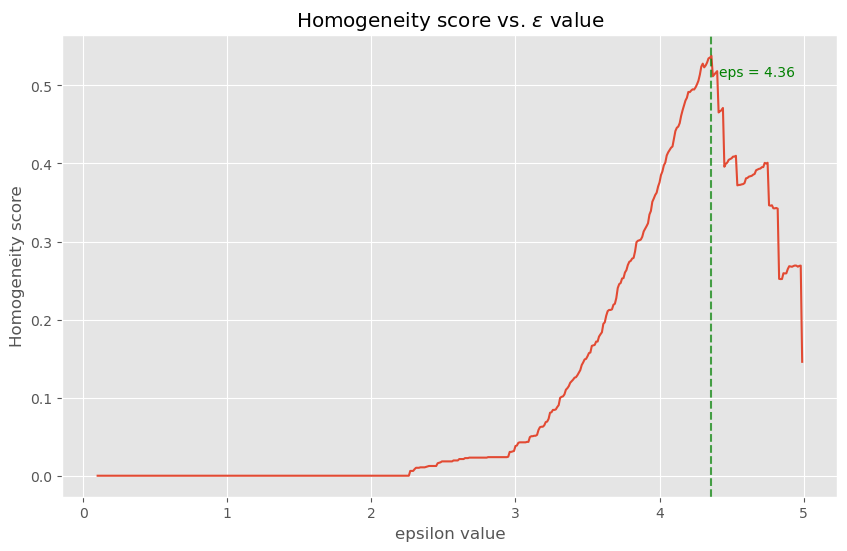

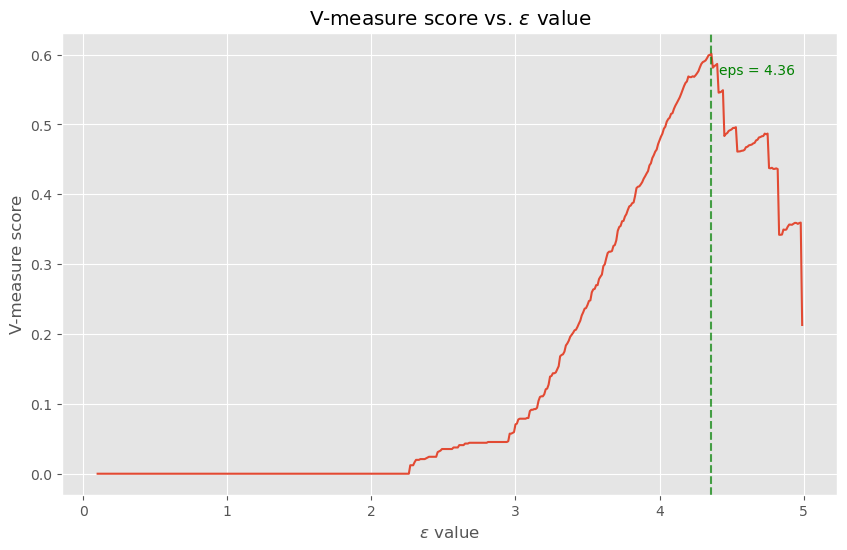

In [64]:
# Use a for loop to find optimal eps value
eps_values = np.arange(0.1, 5.0, 0.01) # eps values from 0.1 to 5.0 with a step of 0.01
h_scores = []
v_scores = []
for eps in eps_values:
    DBSCAN_model = DBSCAN(eps=eps, min_samples=11).fit(X)
    DBSCAN_hscore = metrics.homogeneity_score(labels_true=y, labels_pred=DBSCAN_model.labels_)
    DBSCAN_vscore = metrics.v_measure_score(labels_true=y, labels_pred=DBSCAN_model.labels_)
    h_scores.append(DBSCAN_hscore)
    v_scores.append(DBSCAN_vscore)
    DBSCAN_hscore = round(DBSCAN_hscore, 3)
    print("Homogeneity score and vscore for DBSCAN with eps = %0.2f: hscore = %0.3f, vscore = %0.3f" % (eps, DBSCAN_hscore, DBSCAN_vscore))

# Locate optimal values
optimal_eps_h = eps_values[np.argmax(h_scores)] # Find the index of the maximum value in h_scores
optimal_h = max(h_scores) # Find the maximum value in h_scores

optimal_eps_v = eps_values[np.argmax(v_scores)] # Find the index of the maximum value in v_scores
optimal_v = max(v_scores) # Find the maximum value in v_scores

print("Best eps for homogeneity: %.2f (score = %.3f)" % (optimal_eps_h, optimal_h))
print("Best eps for v-measure: %.2f (score = %.3f)" % (optimal_eps_v, optimal_v))

# Plot the homogeneity scores against eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, h_scores)
plt.axvline(optimal_eps_h, color='green', linestyle='--', alpha=0.7)
plt.text(optimal_eps_h + 0.05, max(h_scores)*0.95, f'eps = {optimal_eps_h:.2f}', color='green')
plt.xlabel('epsilon value')
plt.ylabel('Homogeneity score')
plt.title('Homogeneity score vs. $\epsilon$ value')
plt.show()

# Plot the V-measure scores against eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, v_scores)
plt.axvline(optimal_eps_v, color='green', linestyle='--', alpha=0.7)
plt.text(optimal_eps_v + 0.05, max(v_scores)*0.95, f'eps = {optimal_eps_v:.2f}', color='green')
plt.xlabel('$\epsilon$ value')
plt.ylabel('V-measure score')
plt.title('V-measure score vs. $\epsilon$ value')
plt.show()